# CS 195: Natural Language Processing
## WordSense Disambiguation

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ericmanley/f23-CS195NLP/blob/main/F4_2_WordSenseDisambiguation.ipynb)


## References

Word Senses and WordNet, Chapter 23 of *Speech and Language Processing* by Daniel Jurafsky & James H. Martin: https://web.stanford.edu/~jurafsky/slp3/23.pdf

WordNet documentation: https://www.nltk.org/api/nltk.corpus.reader.wordnet.html

SemCor Corpus Module documentation: https://www.nltk.org/api/nltk.corpus.reader.semcor.html

NLTK Stopwords: https://pythonspot.com/nltk-stop-words/

Lemmatization with NLTK: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/

In [1]:
import sys
!{sys.executable} -m pip install nltk

In [2]:
#you shouldn't need to do this in Colab, but I had to do it on my own machine
#in order to connect to the nltk service
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


## Word Sense Disambiguation

As we explored last time, one word can have many *senses*.

The **WordNet** database can be used to look up different word senses of a particular word.

The task of figuring out which sense is being usede in a given context is called **word sense disambiguation**

Important for
* extracting proper meaning from text
* translation - e.g., different senses of one word in English might have different translations
* question answering

## Typical approach for WSD

Look at the *context* of a word - what other words are around it

For example, consider the word **bank** in

"I need to go to the bank and deposit my paycheck."

We can determine from *deposit*, *paycheck*, and maybe even *go to* that we're talking about a financial institution and not a river bank.

Which definition does the context share the most words with?

*Definition 1:* 'sloping land (especially the slope beside a body of water)'

*Definition 2:* 'a financial institution that accepts deposits and channels the money into lending activities'


In [3]:
def compute_overlap(set1, set2):
    count_overlap = 0
    for item in set1:
        if item in set2:
            count_overlap += 1
    return count_overlap


sentence = ["i", "need", "to", "go", "to", "the", "bank", "and", "deposit", "my", "paycheck"]
definition1 = ["sloping", "land", "especially", "the", "slope", "beside", "a", "body", "of", "water"]
definition2 = ["a", "financial", "institution", "that", "accepts", "deposits", "and", "channels", "the", "money", "into", "lending", "activities"]

print( compute_overlap(sentence,definition1) )
print( compute_overlap(sentence,definition2) )

1
2


### Discuss: What problems do you see with this approach?

## The Simplified Lesk Algorithm

The **Simplified Lesk Algorithm** loops over all possible word senses to find the one whose definition/examples share the most words in common with the sentence context.

Given a `word` and `sentence`
1. Make a *set* of all the words in the sentence (my need to tokenize)
2. Look up all the `synsets` for `word` in **WordNet**
3. Loop through the list of `synsets`
    * create a signature - the set of all the words that appear the definition and list of examples for this `word` from **WordNet** (may need to tokenize)
    * compute the overlap between the signature and the word context
    * if this is better than the previous best overlap, save the new sense

### Discuss: How should we tokenize our text data for this problem?

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import sys
!{sys.executable} -m pip install requests chardet nltk beautifulsoup4 tokenizers transformers

In [10]:
from nltk.corpus import wordnet as wn
#nltk.download('wordnet') #only need to do this once
import requests
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
def simplified_lesk(word,sentence, is_token):
    best_sense = 0
    sense_name = ""


    #fill this in
    if is_token == False:
      sentence_hf_tokens = tokenizer.tokenize( sentence )
    else:
      sentence_hf_tokens = sentence

    my_syns = wn.synsets(word)
    stops = set(stopwords.words('english'))

    for sense in my_syns:
      tokenized_list = set()
      definition = sense.definition()
      examples = sense.examples()

      tokenized_definiton = tokenizer.tokenize( definition )

      for k in stops:
        if k in tokenized_definiton:
          tokenized_definiton.remove(k)

      for i in tokenized_definiton:
        tokenized_list.add(i)
      for i in examples:
        tokenized_examples = tokenizer.tokenize( i )
        for m in tokenized_examples:
          if m not in stops:
            tokenized_list.add(m)


      d = compute_overlap(sentence_hf_tokens, tokenized_list)

      print(d)
      if d > best_sense:
        best_sense = d
        sense_name = sense.name()

    return best_sense, sense_name
simplified_lesk("bank", 'I need to go to the bank to deposit my paycheck', False)

1
1
1
1
0
2
1
1
1
1
1
1
1
0
0
4
1
2


(4, 'deposit.v.02')

### Group Exercise: Finish implementing this algorithm

## Improving the algorithm

Two things we could do to try to improve the Lesk algorithm

1. Remove tokens that don't carry meaning like punctuation and *stopwords* (words like "the", "is", "to", etc.)

2. Lemmatize the words - convert them into their base form

Try to catch the word "deposit(s)" in
* "a financial institution that accepts **deposits** and channels the money into lending activities'
* "I need to go to the bank and **deposit** my paycheck."

## Stopwords Corpus



In [9]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords') #only need to do this once
stops = set(stopwords.words('english'))
print(stops)

{'while', 'before', 'yours', "mightn't", 'o', "that'll", 'doing', 'why', 'each', "weren't", 'those', 'aren', 'been', 'yourself', 'do', 'again', 've', 'are', 'than', "you'd", 'herself', "shan't", "it's", 'these', 'or', 'further', 'haven', 'i', 'ourselves', 'the', "isn't", 'hadn', 'no', 'has', 'isn', 'all', 'in', 'about', "mustn't", 'was', 'own', 'through', 'hasn', 'such', 'not', 'did', 'up', 'few', 'shouldn', 'don', 'being', "you're", 'but', 'under', 'd', 'm', 'its', 'my', 'once', 'off', 'nor', 're', 'for', 'by', 'he', 'same', "you'll", 'she', 'more', 'only', 'hers', 'what', 'above', 'down', 'wasn', 'y', "you've", "haven't", 'him', 'just', 'needn', 'can', 'on', "wouldn't", 's', 'this', "aren't", 'have', 'if', "couldn't", "she's", "doesn't", "won't", 'too', 'against', 'whom', 'after', 'so', 'mightn', 'wouldn', 'is', 'both', 'until', 'into', 'any', 'am', 'between', 'where', 'there', 't', 'didn', 'does', "shouldn't", "hasn't", 'that', 'most', 'myself', "don't", 'having', 'shan', 'her', 'we

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## WordNet Lemmatizer

In [11]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet') #do it once

lemmatizer = WordNetLemmatizer()

print("deposit:", lemmatizer.lemmatize("deposit"))
print("deposits:", lemmatizer.lemmatize("deposits"))

deposit: deposit
deposits: deposit


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Exercise

Add stopword removal and lemmatization to your Lesk Algorithm implementation.

In [ ]:
from nltk.corpus import wordnet as wn
#nltk.download('wordnet') #only need to do this once
import requests
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
def stop_simplified_lesk(word,sentence, is_token):
    best_sense = 0
    sense_name = ""


    #fill this in
    if is_token == False:
      sentence_hf_tokens = tokenizer.tokenize( sentence )
    else:
      sentence_hf_tokens = sentence

    my_syns = wn.synsets(word)
    stops = set(stopwords.words('english'))

    for sense in my_syns:
      tokenized_list = set()
      definition = sense.definition()
      examples = sense.examples()

      tokenized_definiton = tokenizer.tokenize( definition )

      for k in stops:
        if k in tokenized_definiton:
          tokenized_definiton.remove(k)

      for i in tokenized_definiton:
        tokenized_list.add(i)
      for i in examples:
        tokenized_examples = tokenizer.tokenize( i )
        for m in tokenized_examples:
          if m not in stops:
            tokenized_list.add(m)


      d = compute_overlap(sentence_hf_tokens, tokenized_list)

      print(d)
      if d > best_sense:
        best_sense = d
        sense_name = sense.name()

    return best_sense, sense_name
simplified_lesk("bank", 'I need to go to the bank to deposit my paycheck', False)

## Dataset for evaluation WSD

The SemCor NLTK corpus contains text that has been tagged with WordNet sense (mostly Lemmas)

In [14]:
import nltk
nltk.download('semcor') #do this once
from nltk.corpus import semcor

[nltk_data] Downloading package semcor to /root/nltk_data...


In [15]:
# Get a list of file identifiers in SemCor
file_ids = semcor.fileids()
print(file_ids) #looks like they're from the brown dataset

['brown1/tagfiles/br-a01.xml', 'brown1/tagfiles/br-a02.xml', 'brown1/tagfiles/br-a11.xml', 'brown1/tagfiles/br-a12.xml', 'brown1/tagfiles/br-a13.xml', 'brown1/tagfiles/br-a14.xml', 'brown1/tagfiles/br-a15.xml', 'brown1/tagfiles/br-b13.xml', 'brown1/tagfiles/br-b20.xml', 'brown1/tagfiles/br-c01.xml', 'brown1/tagfiles/br-c02.xml', 'brown1/tagfiles/br-c04.xml', 'brown1/tagfiles/br-d01.xml', 'brown1/tagfiles/br-d02.xml', 'brown1/tagfiles/br-d03.xml', 'brown1/tagfiles/br-d04.xml', 'brown1/tagfiles/br-e01.xml', 'brown1/tagfiles/br-e02.xml', 'brown1/tagfiles/br-e04.xml', 'brown1/tagfiles/br-e21.xml', 'brown1/tagfiles/br-e24.xml', 'brown1/tagfiles/br-e29.xml', 'brown1/tagfiles/br-f03.xml', 'brown1/tagfiles/br-f10.xml', 'brown1/tagfiles/br-f19.xml', 'brown1/tagfiles/br-f43.xml', 'brown1/tagfiles/br-g01.xml', 'brown1/tagfiles/br-g11.xml', 'brown1/tagfiles/br-g15.xml', 'brown1/tagfiles/br-h01.xml', 'brown1/tagfiles/br-j01.xml', 'brown1/tagfiles/br-j02.xml', 'brown1/tagfiles/br-j03.xml', 'brown1/t

In [16]:
# Access the sense-tagged sentences from a file
sentences = semcor.sents(file_ids[0])
print(sentences)

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', 'Atlanta', "'s", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term', 'end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]


In [17]:
# Access the sense tags for those sentences
tags = semcor.tagged_sents(file_ids[0],tag="sem")
print(tags)

[[['The'], Tree(Lemma('group.n.01.group'), [Tree('NE', ['Fulton', 'County', 'Grand', 'Jury'])]), Tree(Lemma('state.v.01.say'), ['said']), Tree(Lemma('friday.n.01.Friday'), ['Friday']), ['an'], Tree(Lemma('probe.n.01.investigation'), ['investigation']), ['of'], Tree(Lemma('atlanta.n.01.Atlanta'), ['Atlanta']), ["'s"], Tree(Lemma('late.s.03.recent'), ['recent']), Tree(Lemma('primary.n.01.primary_election'), ['primary', 'election']), Tree(Lemma('produce.v.04.produce'), ['produced']), ['``'], ['no'], Tree(Lemma('evidence.n.01.evidence'), ['evidence']), ["''"], ['that'], ['any'], Tree(Lemma('abnormality.n.04.irregularity'), ['irregularities']), Tree(Lemma('happen.v.01.take_place'), ['took', 'place']), ['.']], [['The'], Tree(Lemma('jury.n.01.jury'), ['jury']), Tree(Lemma('far.r.02.far'), ['further']), Tree(Lemma('state.v.01.say'), ['said']), ['in'], Tree(Lemma('term.n.02.term'), ['term']), Tree(Lemma('end.n.02.end'), ['end']), Tree(Lemma('presentment.n.01.presentment'), ['presentments']), ['

In [20]:
tags = semcor.tagged_sents(file_ids[0])
print(tags)

[[Tree('DT', ['The']), Tree('NNP', ['Fulton', 'County', 'Grand', 'Jury']), Tree('VB', ['said']), Tree('NN', ['Friday']), Tree('DT', ['an']), Tree('NN', ['investigation']), Tree('IN', ['of']), Tree('NN', ['Atlanta']), Tree('POS', ["'s"]), Tree('JJ', ['recent']), Tree('NN', ['primary', 'election']), Tree('VB', ['produced']), Tree(None, ['``']), Tree('DT', ['no']), Tree('NN', ['evidence']), Tree(None, ["''"]), Tree('IN', ['that']), Tree('DT', ['any']), Tree('NN', ['irregularities']), Tree('VB', ['took', 'place']), Tree(None, ['.'])], [Tree('DT', ['The']), Tree('NN', ['jury']), Tree('RB', ['further']), Tree('VB', ['said']), Tree('IN', ['in']), Tree('NN', ['term']), Tree('NN', ['end']), Tree('NN', ['presentments']), Tree('IN', ['that']), Tree('DT', ['the']), Tree('NNP', ['City', 'Executive', 'Committee']), Tree(None, [',']), Tree('WDT', ['which']), Tree('VB', ['had']), Tree('JJ', ['over-all']), Tree('NN', ['charge']), Tree('IN', ['of']), Tree('DT', ['the']), Tree('NN', ['election']), Tree(N

This is a complex format - notice that some (but not all!) of the words are grouped together in a tree structure.

In [18]:
# tags[0] is the tags for the first sentence, sentence[0]
for tag in tags[0]:
    print(tag)

['The']
(Lemma('group.n.01.group') (NE Fulton County Grand Jury))
(Lemma('state.v.01.say') said)
(Lemma('friday.n.01.Friday') Friday)
['an']
(Lemma('probe.n.01.investigation') investigation)
['of']
(Lemma('atlanta.n.01.Atlanta') Atlanta)
["'s"]
(Lemma('late.s.03.recent') recent)
(Lemma('primary.n.01.primary_election') primary election)
(Lemma('produce.v.04.produce') produced)
['``']
['no']
(Lemma('evidence.n.01.evidence') evidence)
["''"]
['that']
['any']
(Lemma('abnormality.n.04.irregularity') irregularities)
(Lemma('happen.v.01.take_place') took place)
['.']


Notice
* Some tokens don't have a tag - stopwords, punctuation, etc. - these show up as a string inside a list
* "Fulton County Grand Jury" is grouped under Lemma('group.n.01.group')
* "primary election" is grouped as a compound word with Lemma('primary.n.01.primary_election')

This is going to be tough to work with. Here's an attempt to loop through them, match them up wit the word from the sentence, and handle these issues.

In [19]:
# for keeping track of which word and tag we're on
word_idx = 0
tag_idx = 0

while tag_idx < len(tags[0]) and word_idx < len(sentences[0]):
    word = sentences[0][word_idx] #the current word
    tag = tags[0][tag_idx] #the tag for the current word

    # check for tags that got assigned to compound words like primary_election
    if len(tag) > 1:
        print("Word:",sentences[0][word_idx:(word_idx+len(tag)-1)])
        print("Tag:",tag)
        word_idx += len(tag) #move to the next word that isn't part of the compound

    # for Tree objects, check if it really tagged a word and not a group
    elif type(tag) is nltk.Tree and type(tag[0]) is str:
        print("Word:",word)
        print("Tag:",tag)

        # here's how we can get the synset for tags that give us a Lemma
        if  type(tag.label()) != str:
            actual_sense = tag.label().synset()
            pred_sense = simplified_lesk(word,sentences[0], True)
            #this is where you could check if you correctly matched the actual sense
            print("ACT SENSE: ", actual_sense)
            print("PRED SENSE: ", pred_sense)

        word_idx += 1 #advance to next word

    # check if it's a punctuation/stopword - if we got here, it means tag was not of type nltk.Tree
    elif type(tag[0]) is str:
        print("Word:",word)
        print("Tag:",tag)
        word_idx += 1

    # If we get gerem it means the Tree contained a group of words, and we can count
    # how many with len( tag.leaves() )
    else:
        print("Word:",word)
        print("Tag:",tag)
        print("Words in this group:",tag.leaves())
        word_idx += len(tag.leaves())
    tag_idx += 1
    print()

Word: The
Tag: ['The']

Word: Fulton
Tag: (Lemma('group.n.01.group') (NE Fulton County Grand Jury))
Words in this group: ['Fulton', 'County', 'Grand', 'Jury']

Word: said
Tag: (Lemma('state.v.01.say') said)
1
2
0
1
2
0
0
1
0
1
1
1
ACT SENSE:  Synset('state.v.01')
PRED SENSE:  (2, 'allege.v.01')

Word: Friday
Tag: (Lemma('friday.n.01.Friday') Friday)
0
ACT SENSE:  Synset('friday.n.01')
PRED SENSE:  (0, '')

Word: an
Tag: ['an']

Word: investigation
Tag: (Lemma('probe.n.01.investigation') investigation)
0
0
ACT SENSE:  Synset('probe.n.01')
PRED SENSE:  (0, '')

Word: of
Tag: ['of']

Word: Atlanta
Tag: (Lemma('atlanta.n.01.Atlanta') Atlanta)
1
0
ACT SENSE:  Synset('atlanta.n.01')
PRED SENSE:  (1, 'atlanta.n.01')

Word: 's
Tag: ["'s"]

Word: recent
Tag: (Lemma('late.s.03.recent') recent)
0
1
1
ACT SENSE:  Synset('late.s.03')
PRED SENSE:  (1, 'recent.s.01')

Word: ['primary']
Tag: (Lemma('primary.n.01.primary_election') primary election)

Word: produced
Tag: (Lemma('produce.v.04.produce') p

## Applied Exploration

For cases where the SemCor dataset has a single word tagged with a WordNet sense, run your `simplified_lesk` code on it and see if it matches. Go through all of the sentences in a particular file_id and compute an accuracy score.

Write notes here on what you did and the results you got.

In [74]:
sentences = semcor.sents(file_ids[1])
tags = semcor.tagged_sents(file_ids[1],tag="sem")
print(sentences)

[['Committee', 'approval', 'of', 'Gov.', 'Price', 'Daniel', "'s", '``', 'abandoned', 'property', "''", 'act', 'seemed', 'certain', 'Thursday', 'despite', 'the', 'adamant', 'protests', 'of', 'Texas', 'bankers', '.'], ['Daniel', 'personally', 'led', 'the', 'fight', 'for', 'the', 'measure', ',', 'which', 'he', 'had', 'watered', 'down', 'considerably', 'since', 'its', 'rejection', 'by', 'two', 'previous', 'Legislatures', ',', 'in', 'a', 'public', 'hearing', 'before', 'the', 'House', 'Committee', 'on', 'Revenue', 'and', 'Taxation', '.'], ...]


In [109]:
sentences = semcor.sents(file_ids[2])
tags = semcor.tagged_sents(file_ids[2], tag="sem")
predictions_right = 0
total_sentences = 0

class AppEx:

  def __init__(self):
    self.accuracy_score = 0
  def sense_acc(self, sentences, tags):
    predictions_right = 0
    total_sentences = 0
    for sentence in sentences:
        word_idx = 0
        tag_idx = 0

        while tag_idx < len(tags[0]) and word_idx < len(sentences[0]):
            word = sentences[0][word_idx]  # The current word
            tag = tags[0][tag_idx]  # The tag for the current word

            # Check for tags that got assigned to compound words like primary_election
            if len(tag) > 1:
                word_idx += len(tag)  # Move to the next word that isn't part of the compound

            # For Tree objects, check if it really tagged a word and not a group
            elif type(tag) is nltk.Tree and type(tag[0]) is str:

                # Here's how we can get the synset for tags that give us a Lemma
                label = tag.label()
                if not isinstance(label, str):
                    try:
                        actual_sense = label.synset()
                        pred_sense = simplified_lesk(word, sentences[0], True)
                        # This is where you could check if you correctly matched the actual sense
                        if actual_sense.name() == pred_sense[1]:
                            predictions_right += 1
                    except AttributeError:
                        word_idx += 1

                total_sentences += 1
                word_idx += 1  # Advance to the next word

            # Check if it's a punctuation/stopword - if we got here, it means tag was not of type nltk.Tree
            elif type(tag[0]) is str:
                word_idx += 1

            # If we get gerem it means the Tree contained a group of words, and we can count
            # how many with len(tag.leaves())
            else:
                leaves = tag.leaves()
                word_idx += len(leaves)

            tag_idx += 1

    self.accuracy_score = (predictions_right / total_sentences)

  def print_score(self):
    return self.accuracy_score

In [104]:
sentences = semcor.sents(file_ids[4])
tags = semcor.tagged_sents(file_ids[4],tag="sem")

In [110]:
aex = AppEx()
aex.sense_acc(sentences, tags)

0
0
1
0
0
1
0
0
0
0
1
1
0
1
1
4
1
1
2
1
1
1
1
1
1
0
1
1
0
0
0
0
1
0
0
1
2
1
1
0
0
0
1
1
0
2
1
0
1
3
0
0
0
0
1
0
0
1
0
0
0
0
1
1
0
1
1
4
1
1
2
1
1
1
1
1
1
0
1
1
0
0
0
0
1
0
0
1
2
1
1
0
0
0
1
1
0
2
1
0
1
3
0
0
0
0
1
0
0
1
0
0
0
0
1
1
0
1
1
4
1
1
2
1
1
1
1
1
1
0
1
1
0
0
0
0
1
0
0
1
2
1
1
0
0
0
1
1
0
2
1
0
1
3
0
0
0
0
1
0
0
1
0
0
0
0
1
1
0
1
1
4
1
1
2
1
1
1
1
1
1
0
1
1
0
0
0
0
1
0
0
1
2
1
1
0
0
0
1
1
0
2
1
0
1
3
0
0
0
0
1
0
0
1
0
0
0
0
1
1
0
1
1
4
1
1
2
1
1
1
1
1
1
0
1
1
0
0
0
0
1
0
0
1
2
1
1
0
0
0
1
1
0
2
1
0
1
3
0
0
0
0
1
0
0
1
0
0
0
0
1
1
0
1
1
4
1
1
2
1
1
1
1
1
1
0
1
1
0
0
0
0
1
0
0
1
2
1
1
0
0
0
1
1
0
2
1
0
1
3
0
0
0
0
1
0
0
1
0
0
0
0
1
1
0
1
1
4
1
1
2
1
1
1
1
1
1
0
1
1
0
0
0
0
1
0
0
1
2
1
1
0
0
0
1
1
0
2
1
0
1
3
0
0
0
0
1
0
0
1
0
0
0
0
1
1
0
1
1
4
1
1
2
1
1
1
1
1
1
0
1
1
0
0
0
0
1
0
0
1
2
1
1
0
0
0
1
1
0
2
1
0
1
3
0
0
0
0
1
0
0
1
0
0
0
0
1
1
0
1
1
4
1
1
2
1
1
1
1
1
1
0
1
1
0
0
0
0
1
0
0
1
2
1
1
0
0
0
1
1
0
2
1
0
1
3
0
0
0
0
1
0
0
1
0
0
0
0
1
1
0
1
1
4
1
1
2
1
1
1
1
1
1
0
1
1
0
0
0
0


KeyboardInterrupt: ignored

In [106]:
print("ACCURACY SCORE: ", round(aex.print_score(), ndigits=2), '%')

ACCURACY SCORE:  0.33 %


In [ ]:
k = 0
acc_list = []
while k < 15:
  sentences = semcor.sents(file_ids[k])
  tags = semcor.tagged_sents(file_ids[k],tag="sem")
  aex.sense_acc(sentences, tags)
  acc_list.append(round(aex.print_score(), ndigits=2))
  k+=1
#acc_list.append("ACCURACY SCORE: " + str(k) + str(round(aex.print_score(), ndigits=2)) + " " + '%')

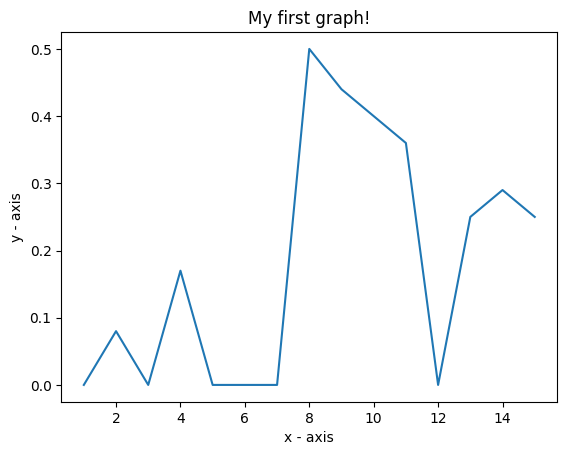

In [119]:
import matplotlib.pyplot as plt
x = range(1, 16)
y = acc_list
plt.plot(x, y)
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('My first graph!')
plt.show()

#NOTES

###WHAT I DID:

I took the previous loop that was given to us in class to print out the actual sense and pred sense. Then I added code to check and see if the two synsets were the same. If so then I added one to the predictions right variable. I then counted up the total amount of sentences that were looped through and divided the correct predictions/total sentences to get the accuracy score.

###RESULTS:

The accuracy varied from file to file but the graph above shows these were the total accuracy score after looping through the first 15 files and graphing the output of their accuracy scores.